### Compare Blondin Toy Models ###

In [1]:
import re
import base64

import pandas as pd
import numpy as np

import yaml

from tardis import run_tardis
from astropy import units as u

from IPython.display import HTML

from tardis.io.parsers import read_blondin_toymodel, convert_blondin_toymodel


/Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:

def create_df_download_link( df, title="Download CSV file", filename="data.csv", type='zip'):
    if type != 'zip':
        csv = df.to_csv()
        b64 = base64.b64encode(csv.encode())
        payload = b64.decode()
    else:
        payload = df.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

def create_download_link(download_data, title="Download CSV file", filename="data.csv", type='zip'):
    if type != 'zip':
        csv = df.to_csv()
        b64 = base64.b64encode(csv.encode())
        payload = b64.decode()
    else:
        payload = df.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

pattern_remove_bracket = re.compile('\[.+\]')
t0_pattern = re.compile('tend = (.+)\n')

#### Comparison of snia_toy01.dat ####

In [3]:
convert_blondin_toymodel('snia_toy01.dat', 'snia_toy01.test.csvy', 9000, 30000, conversion_t_electron_rad=1/0.9)

In [4]:
!code snia_toy01.test.csvy

In [4]:
blondin_dict['v_inner_boundary'] = '9000 km/s'
blondin_dict['v_outer_boundary'] = '20000 km/s'

In [5]:
csvy_file = '---\n{0}\n---\n{1}'.format(yaml.dump(blondin_dict, default_flow_style=False), blondin_csv.to_csv(index=False))

In [6]:
with open('blondin_compare_01.csvy', 'w') as fh:
    fh.write(csvy_file)

**Download the model and setup**

[blondin_compare_01.csvy](blondin_compare_01.csvy)

[blondin_model_compare_01.yml](blondin_model_compare_01.yml)

**Assumptions and explanations**

We assume $T_\textrm{electron} = 0.9 T_\textrm{radiative}$


[Plasma assumptions](../../../physics/plasma/nebular_plasma.rst)


[Line interaction assumptions](../../../physics/montecarlo/lineinteraction.rst)



In [7]:
sim = run_tardis('blondin_model_compare_01.yml')

[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/astropy/units/quantity.py:1067: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError.
  AstropyDeprecationWarning)
 (warnings.py:99)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 3/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.32445e+43 erg / s Luminosity absorbed = 7.18316e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad    next_t_rad         w    next_w
	Shell                                               
	0      9943.504253  11184.865494  0.941908  0.874243
	5      9168.067423  10590.890516  1.150356  0.967498
	10     8678.999816  10184.538479  1.286543  1.029334
	15     8377.317578   9900.090529  1.346125  1.054300
	20     8151.787425   9664.894816  1.358795  1.054968
	25     7985.142325   9510.226327  1.353925  1.037032
	30     7878.847609   9394.106182  1.319217  1.004565
	35     7741.589421   9271.496145  1.307884  0.982576
	40     7655.316512   9161.047735  1.270084  0.949923
	45

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 6/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28283e+43 erg / s Luminosity absorbed = 7.59368e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      12274.410751  12621.985366  0.789790  0.740187
	5      11871.455425  12288.282401  0.792676  0.714197
	10     11649.695187  12107.496695  0.773668  0.683174
	15     11471.210556  11966.421542  0.748405  0.651469
	20     11360.332943  11869.120463  0.712461  0.610504
	25     11218.786535  11782.584290  0.682594  0.576377
	30     11129.781624  11661.517833  0.647152  0.549776
	35     11054.982577  11596.680082  0.615252  0.515964
	40     10978.674047  11486.100778  0.581735  0

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 9/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.26945e+43 erg / s Luminosity absorbed = 7.72465e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      12860.359189  12957.621989  0.708992  0.691150
	5      12638.631249  12803.884316  0.651342  0.624900
	10     12561.844673  12730.751370  0.598991  0.569845
	15     12457.507444  12604.055249  0.554747  0.528149
	20     12405.099383  12583.906104  0.514695  0.485502
	25     12309.733919  12491.390514  0.482479  0.453408
	30     12245.489227  12424.403292  0.450183  0.423553
	35     12183.541188  12380.236496  0.418285  0.388916
	40     12158.321534  12363.358789  0.386364  0

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 12/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.25945e+43 erg / s Luminosity absorbed = 7.81529e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13032.401779  13060.756844  0.684003  0.676972
	5      12990.461599  13053.655799  0.593997  0.583799
	10     12898.821890  12940.461814  0.540517  0.534608
	15     12849.193235  12911.505202  0.490550  0.483174
	20     12828.953617  12900.206203  0.448185  0.439200
	25     12759.303136  12863.788022  0.414128  0.400384
	30     12696.103173  12810.013851  0.385663  0.371252
	35     12697.730273  12825.414714  0.352612  0.338216
	40     12662.177207  12801.179422  0.324425  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 15/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.24191e+43 erg / s Luminosity absorbed = 7.96929e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13110.758198  13157.348776  0.670180  0.660872
	5      13113.028903  13154.537628  0.574875  0.567941
	10     13093.088462  13122.466176  0.515120  0.508848
	15     13078.630835  13143.615683  0.464486  0.455821
	20     13073.991303  13184.013843  0.419770  0.406711
	25     13110.381168  13204.092069  0.375311  0.367136
	30     13055.574882  13126.833694  0.344822  0.339156
	35     13041.575051  13129.174789  0.318035  0.310268
	40     13022.005042  13109.493361  0.292756  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 18/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.23486e+43 erg / s Luminosity absorbed = 8.02956e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13180.535471  13166.826599  0.658012  0.661773
	5      13197.522520  13161.225439  0.562610  0.570444
	10     13174.694866  13164.033321  0.505905  0.508207
	15     13218.240350  13201.849346  0.447772  0.450656
	20     13241.225892  13207.232370  0.403604  0.408133
	25     13281.145141  13265.773013  0.360381  0.360941
	30     13267.313536  13256.622272  0.328384  0.330341
	35     13286.738073  13303.315390  0.297458  0.296541
	40     13181.026751  13239.259991  0.279818  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 21/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.22962e+43 erg / s Luminosity absorbed = 8.07205e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13218.392110  13193.465240  0.649349  0.653651
	5      13203.590883  13227.367950  0.562997  0.559593
	10     13261.694418  13274.159820  0.494806  0.492442
	15     13298.064876  13293.745040  0.438235  0.439388
	20     13250.974631  13288.270014  0.404452  0.399678
	25     13305.202082  13292.192089  0.360661  0.361950
	30     13329.187270  13317.502835  0.326259  0.325734
	35     13351.564942  13401.993759  0.295542  0.290505
	40     13350.505065  13359.932654  0.269488  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 24/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21424e+43 erg / s Luminosity absorbed = 8.21243e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13216.402157  13214.412341  0.652541  0.654355
	5      13237.225427  13266.546018  0.559506  0.557950
	10     13252.209818  13266.925438  0.497424  0.495958
	15     13243.043291  13321.265822  0.449203  0.439403
	20     13279.986369  13300.999426  0.401513  0.399679
	25     13307.974117  13340.522690  0.360489  0.359001
	30     13330.259306  13360.096557  0.326376  0.324063
	35     13361.962084  13425.244338  0.295078  0.290336
	40     13394.308987  13406.012752  0.266887  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 27/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21669e+43 erg / s Luminosity absorbed = 8.18670e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13224.038802  13227.901174  0.649671  0.649570
	5      13254.407087  13253.437801  0.561481  0.562809
	10     13284.603566  13315.822899  0.492310  0.487354
	15     13302.545105  13308.504973  0.439342  0.441817
	20     13292.262849  13313.086028  0.398956  0.398092
	25     13342.035745  13362.257074  0.357113  0.355488
	30     13395.651625  13385.926898  0.320898  0.322538
	35     13464.557456  13455.152434  0.289676  0.290891
	40     13440.515426  13468.663938  0.266129  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 30/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21579e+43 erg / s Luminosity absorbed = 8.19099e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Simulation finished in 30 iterations and took 302.03 s (base.py:306)


In [8]:
spectrum = pd.DataFrame(data = sim.runner.spectrum_integrated.frequency.value, columns=['frequency'])
spectrum['luminosity'] = sim.runner.spectrum_integrated.luminosity_density_nu.value

create_df_download_link(spectrum, title='Download Spectrum', filename='spectrum.csv', type='csv')

In [9]:
spec_artis_toy = pd.read_csv('spec_artis_toy.csv')

[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  styles = read_style_directory(stylelib_path)
 (warnings.py:99)
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


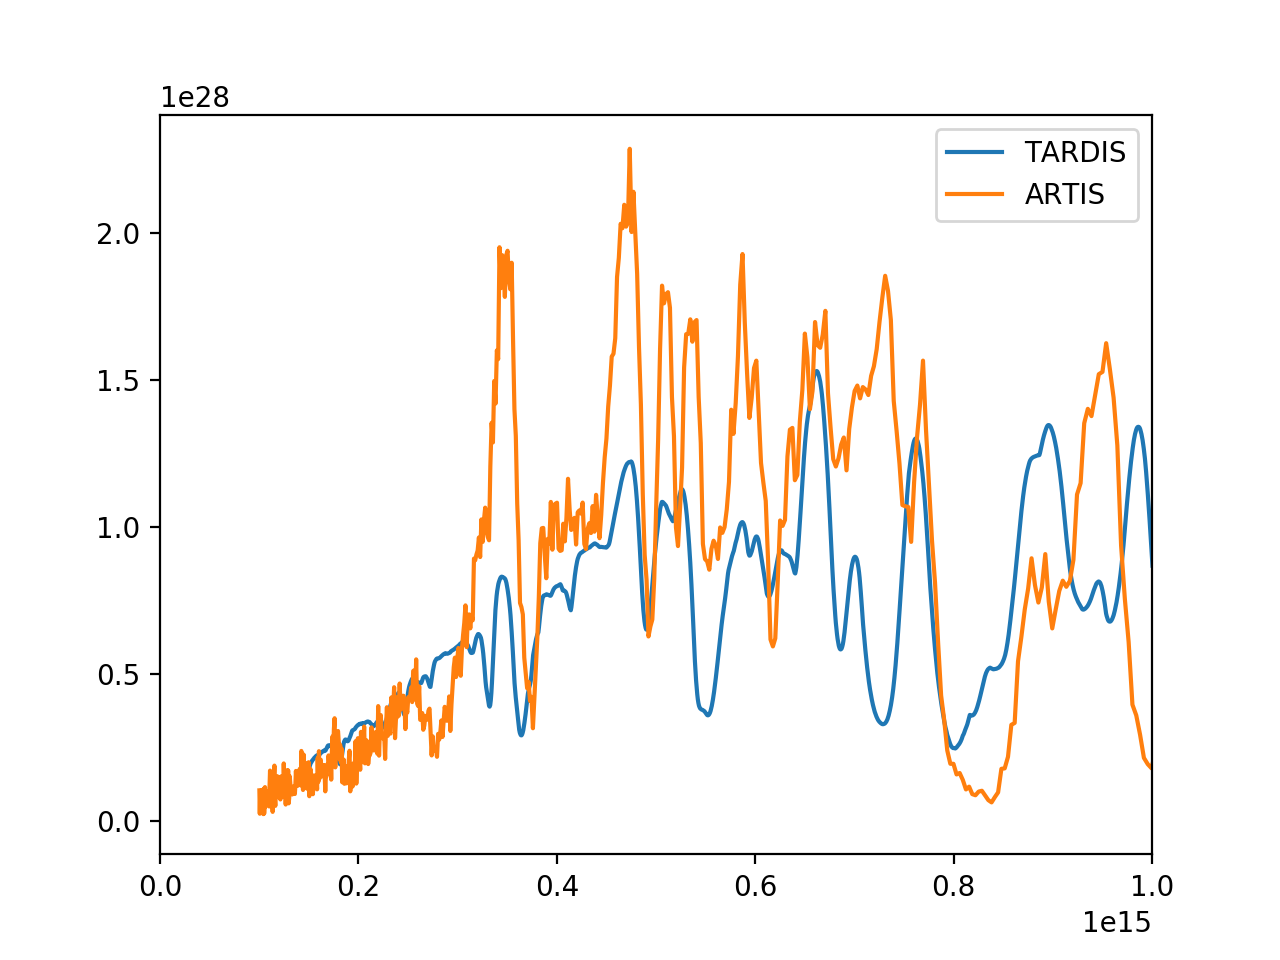

(0, 1000000000000000.0)

In [10]:
%pylab notebook

plot(sim.runner.spectrum_integrated.frequency, sim.runner.spectrum_integrated.luminosity_density_nu, label='TARDIS')
#plot(sim.runner.spectrum_integrated.wavelength, sim.runner.spectrum_integrated.luminosity_density_lambda)
plot(spec_artis_toy['nu'], spec_artis_toy.iloc[:,53] * np.pi * 4 * u.Mpc.to(u.cm)**2, label='ARTIS') 
legend()
xlim(0, 1e15)


#### Comparison of snia_toy06.dat ####

In [11]:
blondin_dict, blondin_csv = read_blondin_toymodel('snia_toy06.dat')

In [12]:
blondin_dict['v_inner_boundary'] = '9000 km/s'
blondin_dict['v_outer_boundary'] = '20000 km/s'

In [13]:
csvy_file = '---\n{0}\n---\n{1}'.format(yaml.dump(blondin_dict, default_flow_style=False), blondin_csv.to_csv(index=False))

**Download the model and setup**

[blondin_compare_06.csvy](blondin_compare_06.csvy)

[blondin_model_compare_06.yml](blondin_model_compare_06.yml)


In [14]:
with open('blondin_compare_06.csvy', 'w') as fh:
    fh.write(csvy_file)

In [15]:
sim = run_tardis('blondin_model_compare_06.yml')

[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/astropy/units/quantity.py:1067: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError.
  AstropyDeprecationWarning)
 (warnings.py:99)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e963500

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 3/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.53288e+42 erg / s Luminosity absorbed = 1.25536e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      25646.127577  21687.341639  0.272341  0.253627
	5      27779.011309  24469.580180  0.166440  0.140872
	10     27647.402177  24909.976327  0.142136  0.116365
	15     26956.243849  24656.427206  0.130006  0.105583
	20     26110.749534  24165.648308  0.121196  0.098350
	25     25184.797764  23409.557036  0.114157  0.094399
	30     23903.310867  22273.546772  0.111695  0.094505
	35     22464.949449  21015.842734  0.111841  0.097335
	40     20807.749039  19598.445762  0.114950  0

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 6/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.81705e+42 erg / s Luminosity absorbed = 1.32768e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      17785.274576  16849.548861  0.306363  0.339130
	5      21098.722865  19982.766676  0.150394  0.168907
	10     21889.872853  20814.585317  0.117945  0.132588
	15     21814.999257  20836.878477  0.105379  0.116916
	20     21484.857487  20562.035214  0.097576  0.108511
	25     20868.094624  20073.230073  0.094251  0.103236
	30     19961.904347  19318.326762  0.095136  0.102658
	35     19040.763859  18473.243508  0.097343  0.103772
	40     17894.437326  17473.192259  0.103005  0

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 9/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.74528e+42 erg / s Luminosity absorbed = 1.33788e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      15749.985522  15458.227551  0.402278  0.427376
	5      18407.128630  17798.747665  0.213512  0.235997
	10     19251.095237  18657.315752  0.165039  0.181372
	15     19350.147374  18805.169772  0.144273  0.158406
	20     19223.160804  18723.570753  0.131226  0.142359
	25     18903.086783  18431.317315  0.122602  0.132699
	30     18263.389823  17838.583491  0.120931  0.129882
	35     17583.304766  17223.765177  0.118426  0.126423
	40     16653.952428  16303.461774  0.121839  0

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 12/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.58967e+42 erg / s Luminosity absorbed = 1.35563e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      15069.724222  14917.931458  0.464318  0.481757
	5      17013.949284  16681.387543  0.272917  0.292093
	10     17767.853217  17391.570403  0.211868  0.226847
	15     17986.842558  17612.334432  0.181022  0.193661
	20     17925.349868  17584.544355  0.162523  0.172830
	25     17673.353533  17308.500502  0.150667  0.161009
	30     17128.254440  16848.358222  0.145715  0.152924
	35     16443.113346  16088.743313  0.142570  0.151807
	40     15546.604684  15092.105047  0.146858  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 15/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.46813e+42 erg / s Luminosity absorbed = 1.37003e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14741.524854  14700.797294  0.505536  0.508817
	5      16302.427661  16129.029953  0.315487  0.325829
	10     16921.612407  16739.045746  0.247221  0.255196
	15     17079.673386  16877.600406  0.212766  0.219726
	20     17010.805933  16753.163119  0.189605  0.199363
	25     16681.660854  16440.254561  0.176962  0.183494
	30     16188.860361  15944.187087  0.167142  0.175580
	35     15452.165154  15198.689814  0.166547  0.174046
	40     14505.502335  14284.787110  0.173630  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 18/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.51856e+42 erg / s Luminosity absorbed = 1.36659e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14626.156540  14563.147157  0.519047  0.527477
	5      15798.406058  15672.389708  0.347915  0.359316
	10     16382.176183  16220.017575  0.274867  0.283670
	15     16504.579428  16333.737367  0.236788  0.244483
	20     16330.206061  16161.729309  0.214864  0.221440
	25     15991.828329  15728.408075  0.199845  0.209432
	30     15434.233842  15188.263972  0.192475  0.200810
	35     14736.494432  14495.726168  0.188556  0.197478
	40     13699.679329  13462.900081  0.201966  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 21/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.53652e+42 erg / s Luminosity absorbed = 1.36571e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14527.510345  14473.750936  0.532630  0.539420
	5      15483.937166  15394.891469  0.372757  0.382897
	10     15969.646152  15830.219839  0.297564  0.308088
	15     16056.775058  15921.169104  0.256721  0.264342
	20     15865.180054  15695.876561  0.232714  0.239606
	25     15387.050754  15232.148714  0.220639  0.227645
	30     14774.849411  14581.300817  0.214992  0.222243
	35     13953.260106  13712.675877  0.217126  0.229782
	40     12972.799163  12790.709179  0.239591  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 24/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.52062e+42 erg / s Luminosity absorbed = 1.36911e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14470.495196  14439.383342  0.540916  0.545080
	5      15344.013647  15287.824637  0.384238  0.388787
	10     15650.287302  15554.430528  0.316687  0.322520
	15     15649.137611  15548.412490  0.275412  0.280082
	20     15355.037039  15278.361758  0.255026  0.256587
	25     14855.790242  14722.099510  0.242837  0.247162
	30     14198.679220  14030.505526  0.239303  0.246144
	35     13337.263084  13202.971353  0.253282  0.258033
	40     12471.883194  12379.235050  0.272017  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 27/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.51806e+42 erg / s Luminosity absorbed = 1.36987e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14447.800661  14417.219086  0.543522  0.549349
	5      15187.337939  15181.195510  0.396558  0.398061
	10     15372.013233  15328.307051  0.332810  0.334343
	15     15255.096011  15203.511026  0.296214  0.298500
	20     14975.570690  14808.409736  0.271200  0.279158
	25     14386.021279  14261.242828  0.261695  0.269496
	30     13656.578942  13521.940483  0.266606  0.273082
	35     12866.983707  12680.830794  0.279457  0.290405
	40     12177.931229  12012.770662  0.292067  

[tardis.simulation.base][INFO   ]  t_inner 13000.000 K -- next t_inner 13000.000 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 30/30 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.60081e+42 erg / s Luminosity absorbed = 1.36197e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Simulation finished in 30 iterations and took 337.79 s (base.py:306)


In [16]:
spectrum = pd.DataFrame(data = sim.runner.spectrum_integrated.frequency.value, columns=['frequency'])
spectrum['luminosity'] = sim.runner.spectrum_integrated.luminosity_density_nu.value

create_df_download_link(spectrum, title='Download Spectrum', filename='spectrum.csv', type='csv')

In [23]:
sim.plasma.ion_number_density / sim.plasma.number_density

0             1             2    \
atomic_number ion_number                                             
14            0           3.371573e-15  2.836444e-15  2.419784e-15   
              1           2.022453e-06  1.705701e-06  1.462930e-06   
              2           3.887190e-01  3.393144e-01  3.008827e-01   
              3           6.112531e-01  6.606446e-01  6.990609e-01   
              4           2.587464e-05  3.930435e-05  5.492756e-05   
              5           0.000000e+00  0.000000e+00  0.000000e+00   
              6           0.000000e+00  0.000000e+00  0.000000e+00   
              7           0.000000e+00  0.000000e+00  0.000000e+00   
              8           0.000000e+00  0.000000e+00  0.000000e+00   
              9           0.000000e+00  0.000000e+00  0.000000e+00   
              10          0.000000e+00  0.000000e+00  0.000000e+00   
              11          0.000000e+00  0.000000e+00  0.000000e+00   
              12          0.000000e+00  0.000000e+00  0.000000e+00   
              13          0.000000e+00  0.000000e+00  0.000000e+00   
              14          0.000000e+00  0.000000e+00  0.000000e+00   
16            0           2.016802e-12  1.658852e-12  1.393517e-12   
              1           2.394294e-04  2.040317e-04  1.771086e-04   
              2           8.434871e-01  8.111234e-01  7.807144e-01   
              3           1.562730e-01  1.886718e-01  2.191073e-01   
              4           4.416652e-07  7.660508e-07  1.195779e-06   
              5           1.740392e-20  5.708941e-20  1.493104e-19   
              6           0.000000e+00  0.000000e+00  0.000000e+00   
              7           0.000000e+00  0.000000e+00  0.000000e+00   
              8           0.000000e+00  0.000000e+00  0.000000e+00   
              9           0.000000e+00  0.000000e+00  0.000000e+00   
              10          0.000000e+00  0.000000e+00  0.000000e+00   
              11          0.000000e+00  0.000000e+00  0.000000e+00   
              12          0.000000e+00  0.000000e+00  0.000000e+00   
              13          0.000000e+00  0.000000e+00  0.000000e+00   
              14          0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
27            27          0.000000e+00  0.000000e+00  0.000000e+00   
28            0           3.867508e-15  3.345109e-15  2.918472e-15   
              1           4.768144e-06  4.199161e-06  3.730841e-06   
              2           7.608692e-01  7.150802e-01  6.735910e-01   
              3           2.391261e-01  2.849156e-01  3.264053e-01   
              4           5.988713e-09  1.116299e-08  1.840678e-08   
              5           1.638349e-24  6.005792e-24  1.712472e-23   
              6           0.000000e+00  0.000000e+00  0.000000e+00   
              7           0.000000e+00  0.000000e+00  0.000000e+00   
              8           0.000000e+00  0.000000e+00  0.000000e+00   
              9           0.000000e+00  0.000000e+00  0.000000e+00   
              10          0.000000e+00  0.000000e+00  0.000000e+00   
              11          0.000000e+00  0.000000e+00  0.000000e+00   
              12          0.000000e+00  0.000000e+00  0.000000e+00   
              13          0.000000e+00  0.000000e+00  0.000000e+00   
              14          0.000000e+00  0.000000e+00  0.000000e+00   
              15          0.000000e+00  0.000000e+00  0.000000e+00   
              16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   
              21          0.000000e+00  0.000000e+00  0.000000e+00   
              22          0.000000e+00  0.000000e+00  0.000000e+00   
              23          0.000000e+00  0.000